In [30]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay
import os

# Question 3.

## Part 1

In [31]:
# read in the dataset
os.getcwd()

'C:\\Program Files\\JetBrains\\PyCharm 2024.2.1\\bin'

In [30]:
file_path = r'data/marriage.csv'
print(os.path.exists(file_path))

False


In [19]:
current_dir = os.getcwd()
print(f"Current Directory: {current_dir}")

Current Directory: C:\Program Files\JetBrains\PyCharm 2024.2.1\bin


In [4]:
df = pd.read_csv(r'./data/marriage.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.560903,3.681587,3.450467,3.211998,-1.203045,0.597706,-0.970093,-0.750970,-0.511495,-0.133660,...,2.077401,1.184182,3.955069,2.608046,2.303629,1.721660,3.275018,1.761019,1.215237,1.0
1,4.153272,5.173858,4.100690,2.580173,3.305788,-1.505512,-0.029398,5.702657,2.230281,4.975496,...,3.467076,2.451984,3.504294,5.324240,4.480607,5.375248,2.270379,2.167944,2.191214,1.0
2,2.226241,1.575322,2.389117,2.725405,-0.304562,2.832803,1.787779,0.565755,1.328212,2.335353,...,1.200917,1.241794,2.207492,1.228034,0.870052,1.685040,2.341985,-0.444320,2.527452,1.0
3,3.553458,2.859042,2.928414,1.833241,1.271119,4.165213,2.078597,4.506175,2.521628,2.747315,...,3.196291,2.204824,3.664982,3.689508,2.577677,3.171884,2.164660,1.813024,1.376033,1.0
4,0.506547,1.419223,1.716153,1.319274,2.853840,0.047412,-0.016515,0.620795,1.202992,0.078347,...,1.806657,2.085539,2.012551,1.899477,1.510134,1.373350,2.551119,0.846321,-0.066858,1.0


In [14]:
# split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=123)
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
155,1.791412,0.225486,-0.853676,2.838982,-1.314309,0.238783,0.830079,-0.199560,-1.015145,0.668509,...,0.140615,3.176583,-0.986151,1.534040,1.288450,2.765931,1.946270,2.797498,0.711728,1.306213
20,4.104766,3.445825,4.124762,2.900345,4.530835,0.149669,0.460807,4.322281,2.260241,2.704272,...,2.231096,3.138379,2.841479,4.577163,3.287443,4.180101,4.553495,4.714258,4.471990,2.945501
28,3.247502,3.317237,1.437585,2.738556,1.650546,-0.722212,-0.102256,3.514160,2.994471,3.579858,...,2.045025,3.449203,4.420116,5.339588,3.099545,5.609117,5.084799,3.528925,2.447684,4.280870
13,3.593416,4.238036,3.197764,4.154945,2.652929,-1.108020,2.262888,5.062135,2.726840,3.572886,...,2.779538,3.753651,3.516883,3.675742,3.516329,5.525730,3.113448,3.087527,3.676475,1.544264
121,0.205538,0.073263,0.809900,1.749214,-0.077430,0.603624,0.515497,-0.973856,-0.670512,1.985441,...,-0.367261,-0.955037,0.455032,3.192520,1.454618,2.157498,-0.179074,-0.211223,3.979009,-0.827406


In [15]:
y_train.head()

155    0.0
20     1.0
28     1.0
13     1.0
121    0.0
Name: 54, dtype: float64

In [16]:
print(y_train.value_counts())
print(y_test.value_counts())

54
1.0    71
0.0    65
Name: count, dtype: int64
54
0.0    21
1.0    13
Name: count, dtype: int64


In [17]:
# instantiate and train each model: baseline parameters

lrc = LogisticRegression()
gnb = GaussianNB(var_smoothing = 1e-3) # per assignment requirement to avoid division by 0 error
knn = KNeighborsClassifier()

# fit the models
lrc.fit(x_train, y_train)
gnb.fit(x_train, y_train)
knn.fit(x_train, y_train)

# make predictions
y_pred_lrc = lrc.predict(x_test)
y_pred_gnb = gnb.predict(x_test)
y_pred_knn = knn.predict(x_test)

# print the accuracy for each classifier
accuracy_lrc = accuracy_score(y_test, y_pred_lrc)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f'Accuracy for Logistic Regression: {accuracy_lrc}')
print(f'Accuracy for Gaussian NB: {accuracy_gnb}')
print(f'Accuracy for KNN: {accuracy_knn}')



Accuracy for Logistic Regression: 1.0
Accuracy for Gaussian NB: 1.0
Accuracy for KNN: 1.0


In [33]:
# for more robust results, perform Monte Carlo CV with different data splits on each run. Return accuracy score and mean of accuracy score
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# we will use the same classifiers as before

def monte_carlo_cv(X, y):
    n_runs = 1000
    random_state = 123
    
    results = {
        'lrc': [],
        'gnb': [],
        'knn': []
    }
    
    
    for i in range(n_runs):
        # Split the data and make sure it splits differently each run
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= random_state + i)
        
        # Logistic Regression
        lrc.fit(X_train, y_train)
        gnb.fit(X_train, y_train)
        knn.fit(X_train, y_train)
        
        # predict data points
        y_pred_lrc = lrc.predict(X_test)
        y_pred_gnb = gnb.predict(X_test)
        y_pred_knn = knn.predict(X_test)
        
        # calculate accuracy score and append to results
        accuracy_lrc = accuracy_score(y_test, y_pred_lrc)
        accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
        accuracy_knn = accuracy_score(y_test, y_pred_knn)
        
        results['lrc'].append(accuracy_lrc)
        results['gnb'].append(accuracy_gnb)
        results['knn'].append(accuracy_knn)
    
    return results
        
# plot distributions
def plot_results(results, title):
    
    
    for name, scores in results.items():
        mean_acc = np.mean(scores)
        var_acc = np.var(scores)
        print(f'{name} - Mean Accuracy: {mean_acc:.4f}, Variance: {var_acc:.6f}')
        plt.figure(figsize=(10, 6))
        plt.hist(scores, bins = 10, alpha=0.7)
        
        plt.title(f'{name} - {title}\nMean Accuracy = {mean_acc:.4f}, Variance = {var_acc:.6f}')
        plt.xlabel('Accuracy')
        plt.ylabel('Frequency')
        plt.savefig(f'./outputs/{title}-{name}.png')
        plt.show()




In [23]:
# calculate

results_baseline = monte_carlo_cv(X_scaled, y)

lrc - Mean Accuracy: 0.9761, Variance: 0.000581


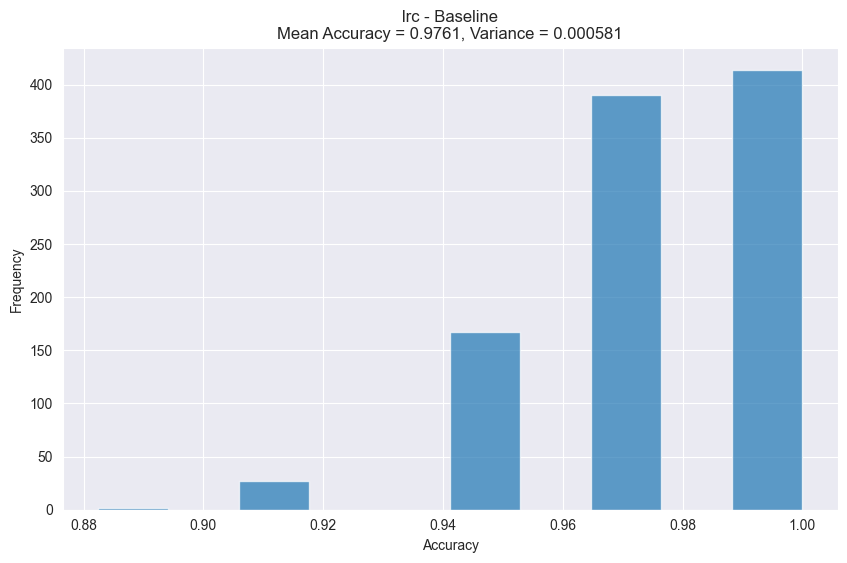

gnb - Mean Accuracy: 0.9766, Variance: 0.000560


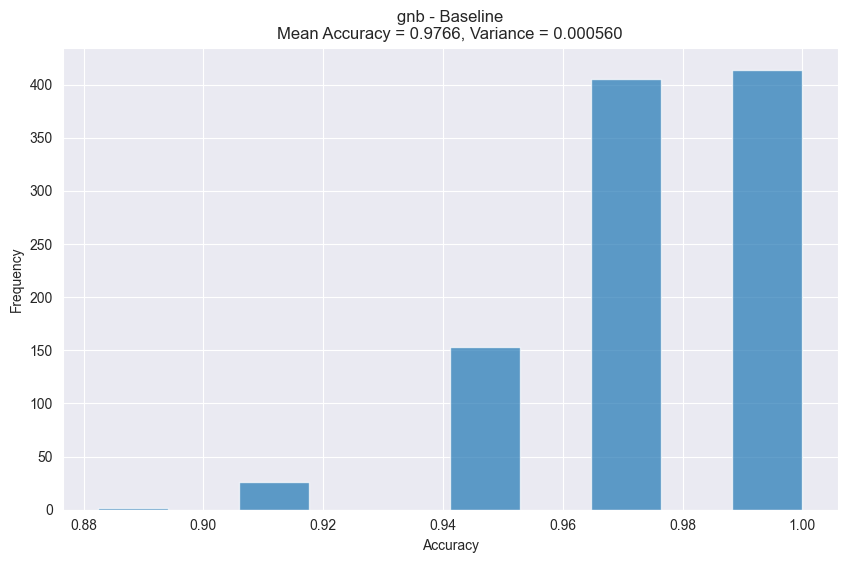

knn - Mean Accuracy: 0.9766, Variance: 0.000560


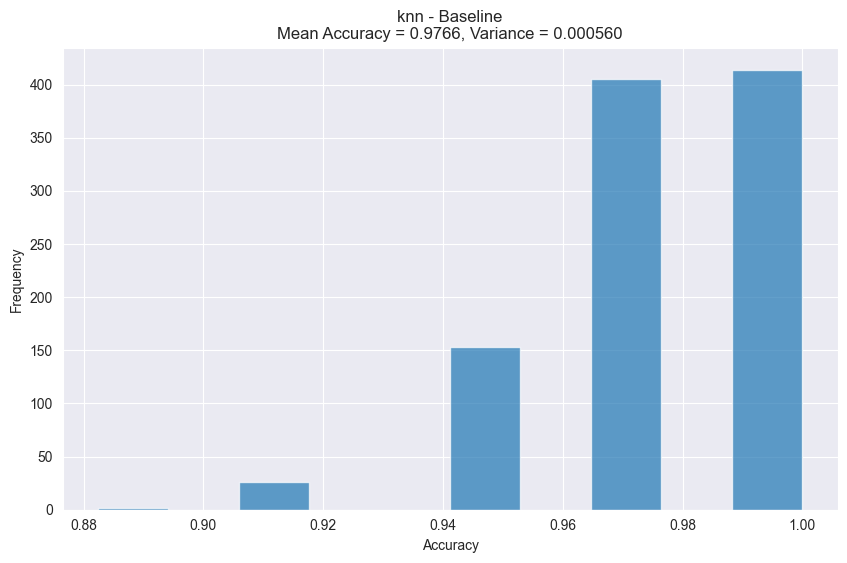

In [34]:
# plot
plot_results(results_baseline, 'Baseline')


## Part 2: PCA

In [27]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)




In [28]:
# calculate

results_pca = monte_carlo_cv(X_pca, y)

lrc - Mean Accuracy: 0.9797, Variance: 0.000605


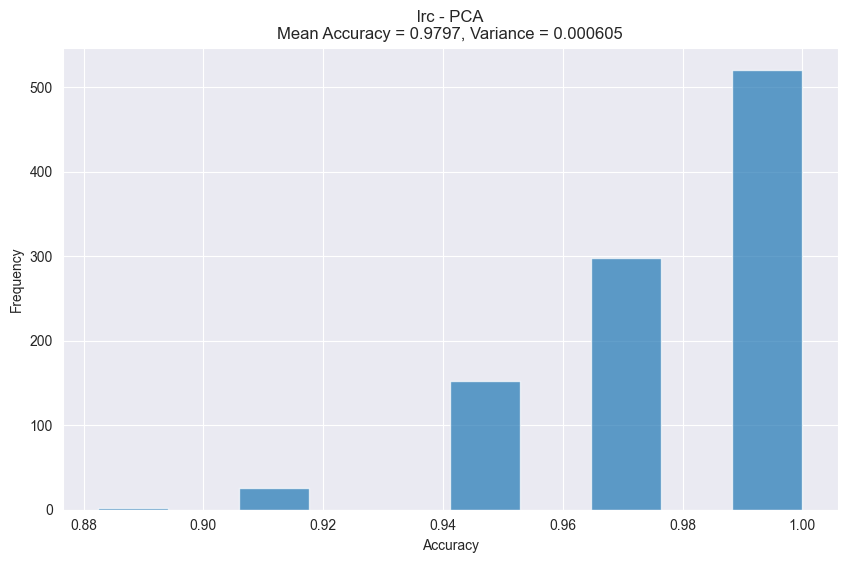

gnb - Mean Accuracy: 0.9766, Variance: 0.000561


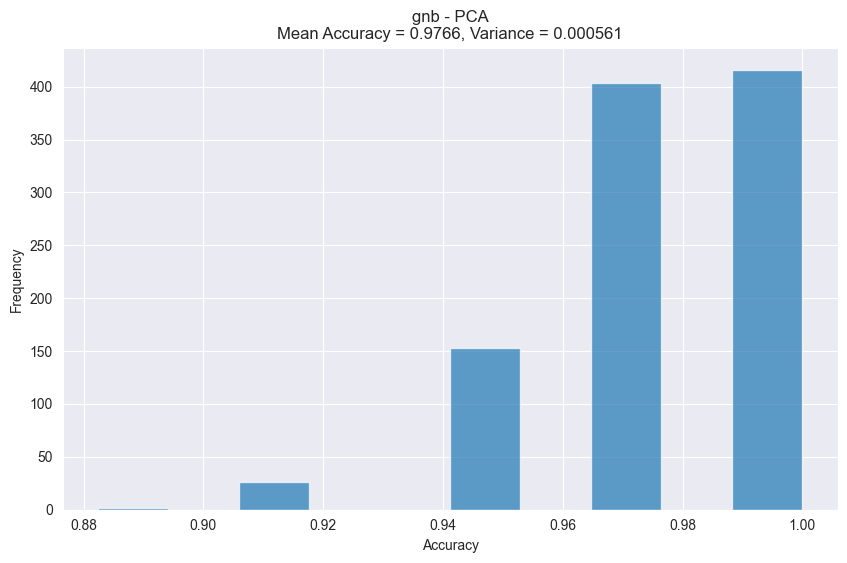

knn - Mean Accuracy: 0.9798, Variance: 0.000606


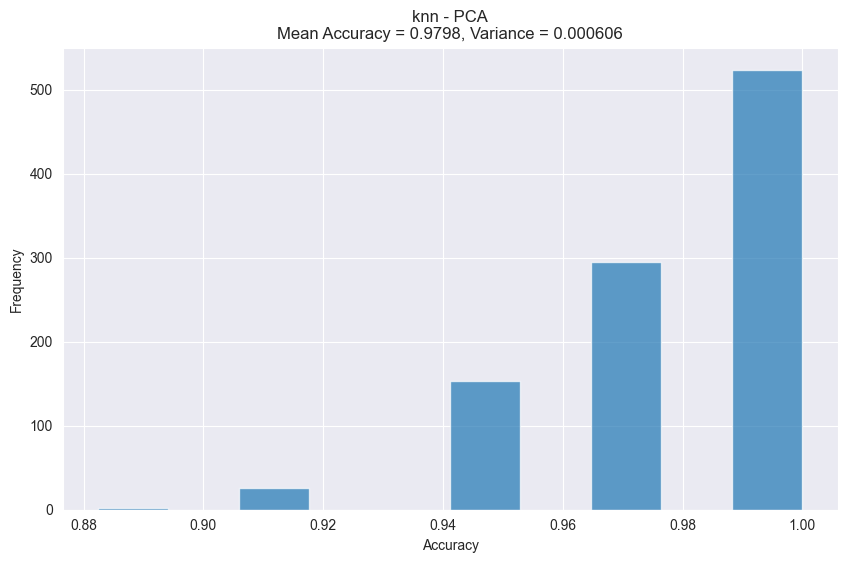

In [35]:
# plot
plot_results(results_pca, 'PCA')

In [37]:
# define a function to plot the decision boundaries
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=123)

gnb.fit(X_train, y_train)
lrc.fit(X_train, y_train)
knn.fit(X_train, y_train)

def plot_decision_boundaries(X, y, model_name, model):
    plt.figure(figsize=(8, 6))
    disp = DecisionBoundaryDisplay.from_estimator(model, X, response_method="predict", alpha=0.6, cmap=plt.cm.Paired)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap=plt.cm.Paired)
    plt.title(f'{model_name} Decision Boundary')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.savefig(f'./outputs/{model_name}-boundary.png')
    plt.show()


<Figure size 800x600 with 0 Axes>

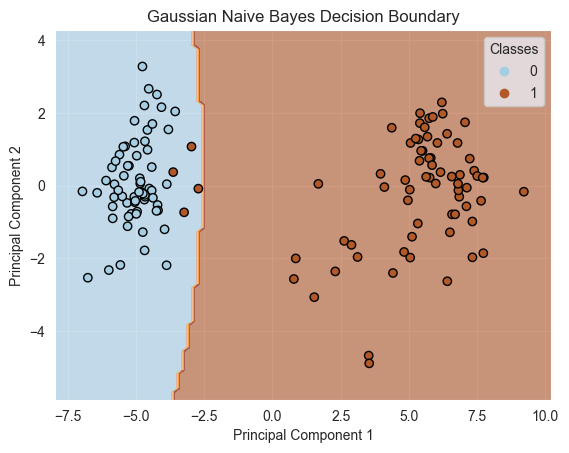

<Figure size 800x600 with 0 Axes>

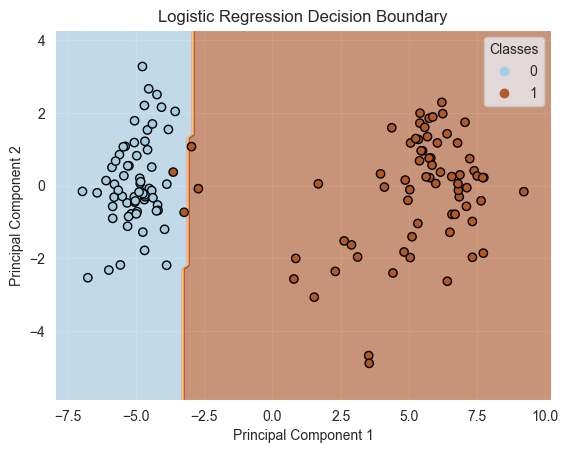

<Figure size 800x600 with 0 Axes>

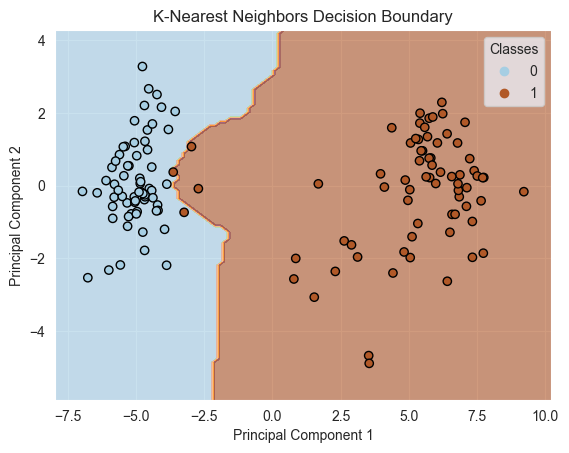

In [38]:
# Plot decision boundaries for each classifier
plot_decision_boundaries(X_train, y_train, 'Gaussian Naive Bayes', gnb)
plot_decision_boundaries(X_train, y_train, 'Logistic Regression', lrc)
plot_decision_boundaries(X_train, y_train, 'K-Nearest Neighbors', knn)